<a href="https://colab.research.google.com/github/big-basket/Airport-System-Coursework/blob/main/CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# !pip install dask-ml
# %pip install dask-ml
# import dask.dataframe as dd

# from dask_ml.preprocessing import Categorizer, DummyEncoder
#  from dask_ml.preprocessing import LabelEncoder, StandardScaler

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# from dask_ml.linear_model import LinearRegression

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib
import seaborn as sns

In [14]:
df = pd.read_csv("DelayedFlights.csv")

In [15]:
df.drop(columns=["Year", "FlightNum", "TailNum"], inplace=True)

In [16]:
col = {"CarrierDelay":0, "WeatherDelay":0, "NASDelay":0, "SecurityDelay":0, "LateAircraftDelay":0}
df.fillna(col, inplace=True)
df.dropna(thresh=20, inplace=True)

In [17]:
X = df.drop(columns=["DepDelay", "CancellationCode"])
y = df["DepDelay"]

In [18]:
# Convert relevant columns to proper types
# X["Cancelled"] = X["Cancelled"].astype(bool)
# X["Diverted"] = X["Diverted"].astype(bool)
# X["Distance"] = X["Distance"].fillna(0).astype(int)

# Use Dask-ML's LabelEncoder
le = LabelEncoder()
X["UniqueCarrier"] = le.fit_transform(X["UniqueCarrier"])
X["Origin"] = le.fit_transform(X["Origin"])
X["Dest"] = le.fit_transform(X["Dest"])

In [19]:
scaler = StandardScaler()

X = scaler.fit_transform(X)  # Scale the DataFrame

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
print("🌲 Random Forest Regressor Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred_class = clf_rf.predict(X_test)

# Evaluation
print("🛬 Random Forest Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))


KeyboardInterrupt: 

In [22]:
df["UniqueCarrier"] = le.fit_transform(df["UniqueCarrier"])
df["Origin"] = le.fit_transform(df["Origin"])
df["Dest"] = le.fit_transform(df["Dest"])

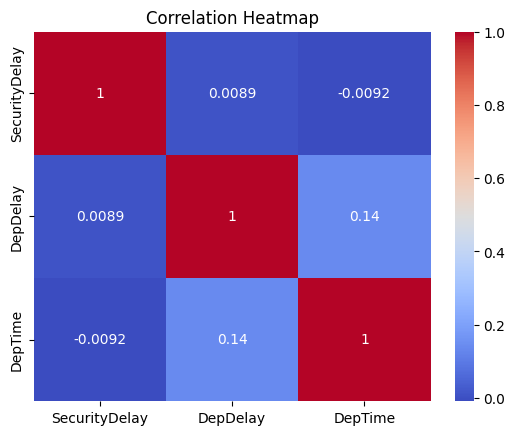

In [29]:
# Select relevant columns and compute correlation
corr = df[["SecurityDelay", "DepDelay", "DepTime"]].corr()

# Plot heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

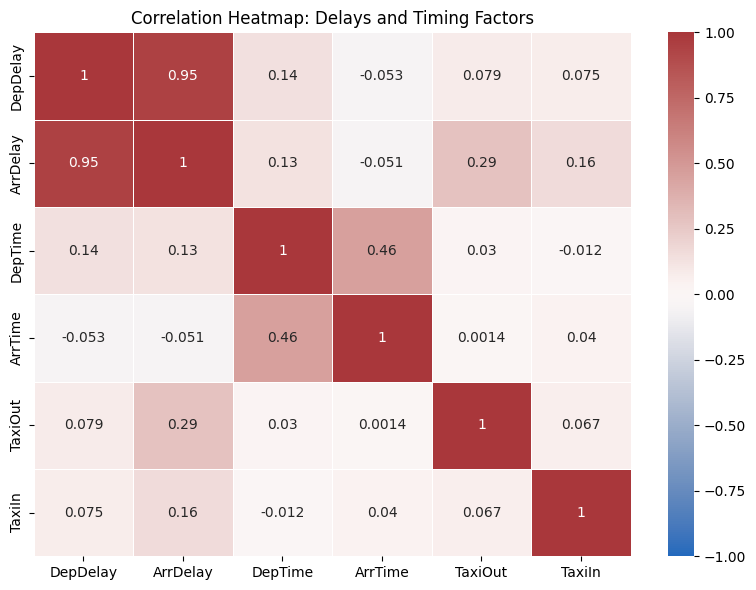

In [33]:

# Define the selected columns
selected_columns = ["DepDelay", "ArrDelay", "DepTime", "ArrTime", "TaxiOut", "TaxiIn"]

# Compute correlation matrix
corr = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="vlag", annot=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Delays and Timing Factors")
plt.tight_layout()
plt.show()

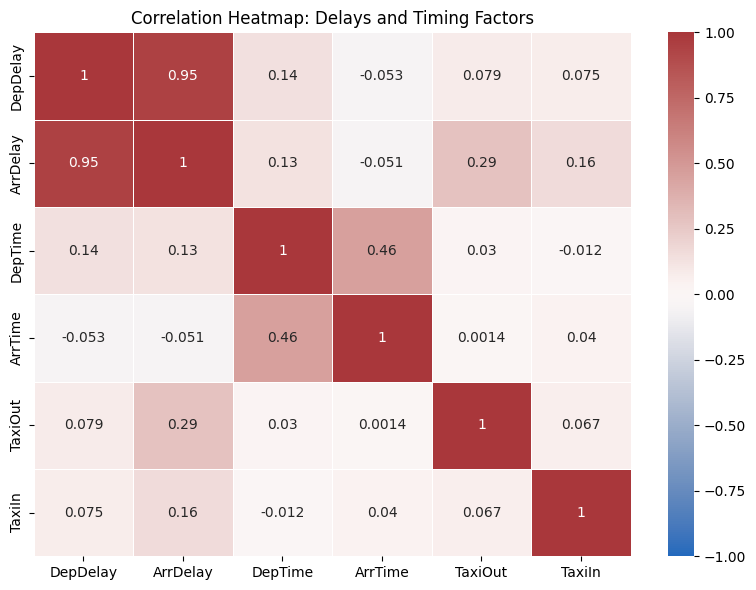

In [38]:

# Define the selected columns
selected_columns = ["DepDelay", "ArrDelay", "DepTime", "ArrTime", "TaxiOut", "TaxiIn"]

# Compute correlation matrix
corr = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="vlag", annot=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Delays and Timing Factors")
plt.tight_layout()
plt.show()

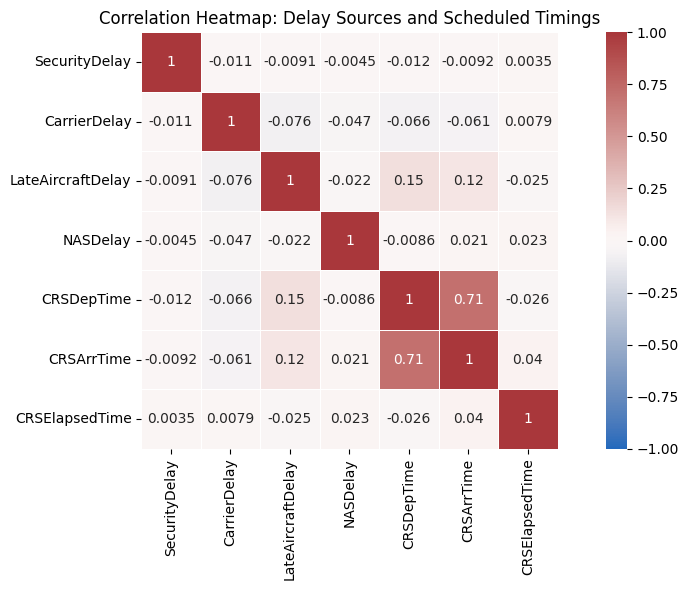

In [40]:
selected_columns = [
    "SecurityDelay", "CarrierDelay", "LateAircraftDelay",
    "NASDelay", "CRSDepTime", "CRSArrTime", "CRSElapsedTime"
]

# Drop rows with any NaN values in selected columns to avoid errors
corr = df[selected_columns].corr()

# Compute the correlation matrix
# corr = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="vlag", annot=True, linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap: Delay Sources and Scheduled Timings")
plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(y_pd, bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Delay in Minutes")
plt.ylabel("Number of Flights")
plt.show()

NameError: name 'y_pd' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.compute(), x="UniqueCarrier", y="DepDelay", estimator=np.mean)
plt.title("Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'compute'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.compute(), x="DayOfWeek", y="DepDelay")
plt.title("Delay Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Departure Delay")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'compute'

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
numeric_corr = df.select_dtypes(include='number').compute().corr()
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'compute'

<Figure size 1000x800 with 0 Axes>

In [ ]:
importances = rf_reg.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else X_train_scaled_df.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_class_test, y_pred_class)
plt.title("Confusion Matrix: Delay Risk Classifier")
plt.show()


NameError: name 'y_class_test' is not defined

In [ ]:
plt.savefig("avg_delay_by_airline.png", dpi=300)


<Figure size 640x480 with 0 Axes>